### Anomaly Detection

Students: **Чича Олександр та Мельничук Павло**

Mentor: **Anna Mandrenko, Yevhenii Kubiuk**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
path = "ambient_temperature_system_failure.csv"
data_frame = pd.read_csv(path)
data_frame

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [3]:
data_frame.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


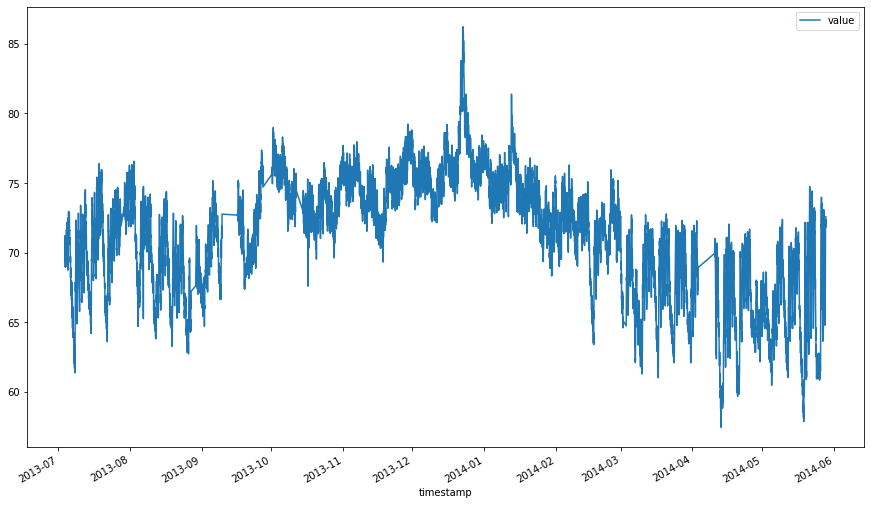

In [4]:
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'])
data_frame.plot(x='timestamp', figsize=(15, 9))

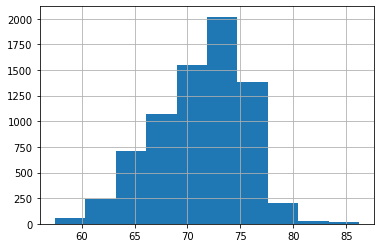

In [10]:
data_frame['value'].hist()

In [7]:
data_frame['hour'] = data_frame['timestamp'].dt.hour

daylight_list = []
for i in data_frame['hour']:
    if i>=0 and i<12:
        daylight_list.append(0)
    else :
        daylight_list.append(1)
data_frame["daylight"] = daylight_list

data_frame["day of week"] = data_frame['timestamp'].dt.weekday

data_frame["is weekend"] = data_frame["day of week"]>4

data_frame["day of the year"] = data_frame['timestamp'].dt.dayofyear

data_frame["year"] = data_frame['timestamp'].dt.year

data_frame

,timestamp,value,hour,daylight,day of week,is weekend,day of the year,year
0,2013-07-04 00:00:00,69.880835,0,0,3,False,185,2013
1,2013-07-04 01:00:00,71.220227,1,0,3,False,185,2013
2,2013-07-04 02:00:00,70.877805,2,0,3,False,185,2013
3,2013-07-04 03:00:00,68.959400,3,0,3,False,185,2013
4,2013-07-04 04:00:00,69.283551,4,0,3,False,185,2013
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,0,2,False,148,2014
7263,2014-05-28 12:00:00,72.172956,12,1,2,False,148,2014
7264,2014-05-28 13:00:00,72.046565,13,1,2,False,148,2014
7265,2014-05-28 14:00:00,71.825226,14,1,2,False,148,2014


In [8]:
data_frame.nunique()

timestamp          7267
value              7267
hour                 24
daylight              2
day of week           7
is weekend            2
day of the year     311
year                  2
dtype: int64

In [9]:
print('missing values:\n',data_frame.isnull().sum())

missing values:
 timestamp          0
value              0
hour               0
daylight           0
day of week        0
is weekend         0
day of the year    0
year               0
dtype: int64


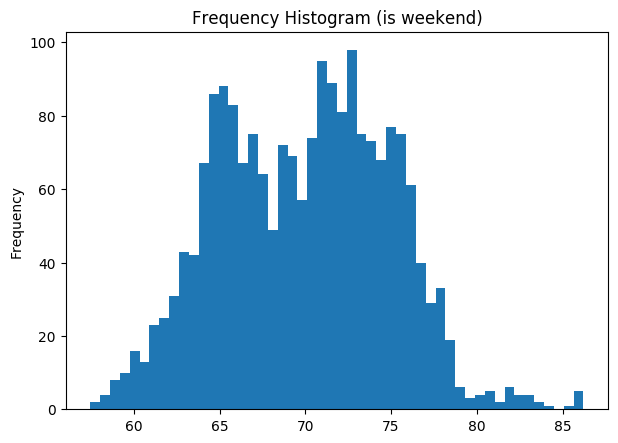

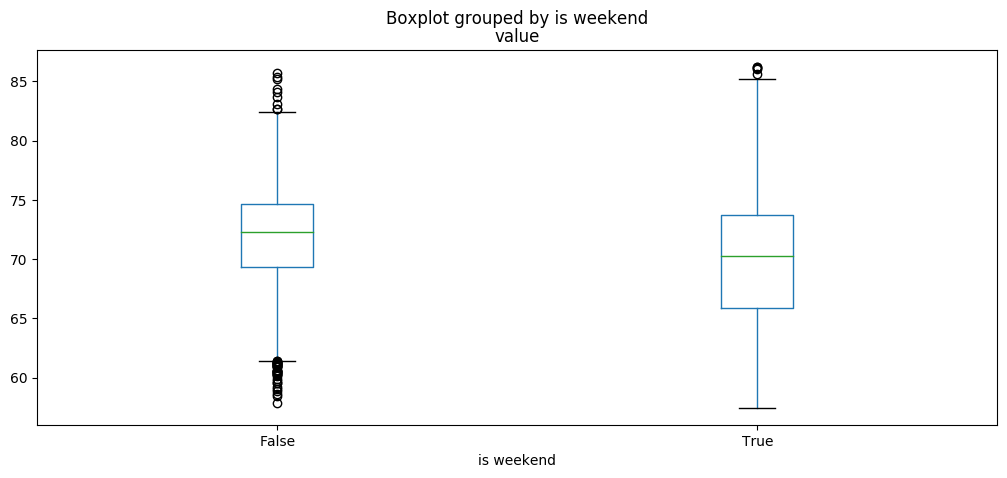

In [14]:
plt.rcParams.update({"figure.figsize":(7,5), "figure.dpi":100})

plt.hist(data_frame.loc[data_frame["is weekend"] == True]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (is weekend)", ylabel="Frequency")

data_frame.boxplot(by='is weekend', column=['value'], grid=False, figsize=(12,5))

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Frequency Histogram')]

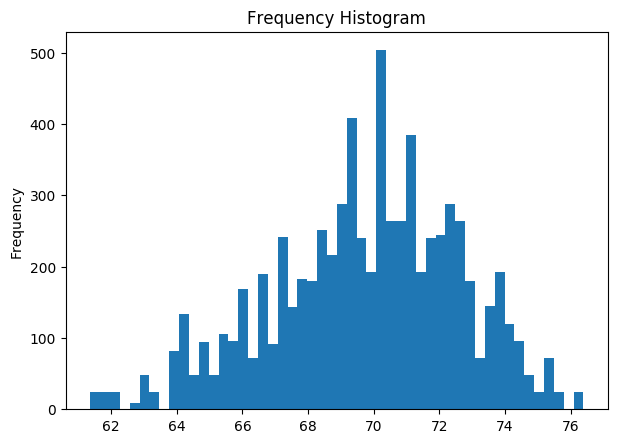

In [15]:
plt.hist(data_frame.loc[data_frame["day of the year"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram", ylabel="Frequency")

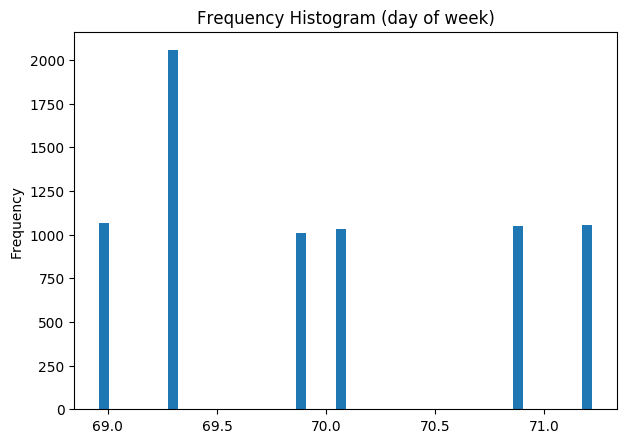

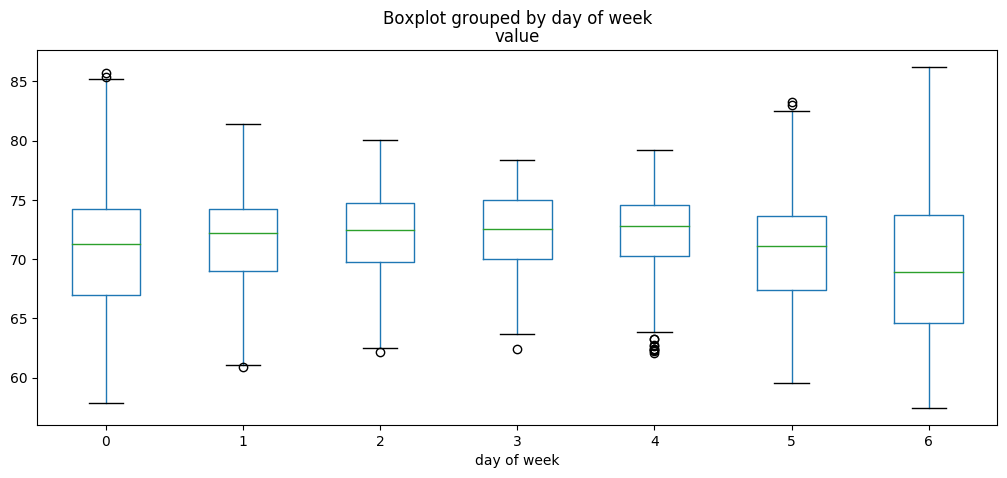

In [16]:
plt.hist(data_frame.loc[data_frame["day of week"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (day of week)", ylabel="Frequency")

data_frame.boxplot(by='day of week', column=['value'], grid=False, figsize=(12,5))

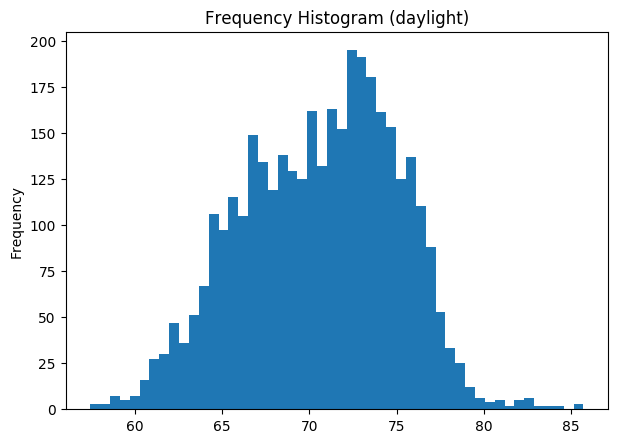

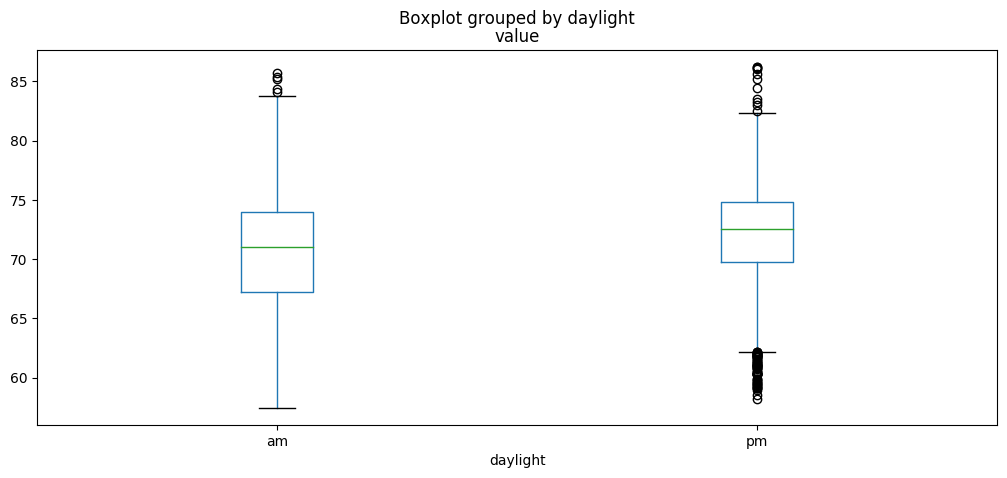

In [58]:
plt.hist(data_frame.loc[data_frame["daylight"] == "am"]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (daylight)", ylabel="Frequency")

data_frame.boxplot(by='daylight', column=['value'], grid=False, figsize=(12,5))

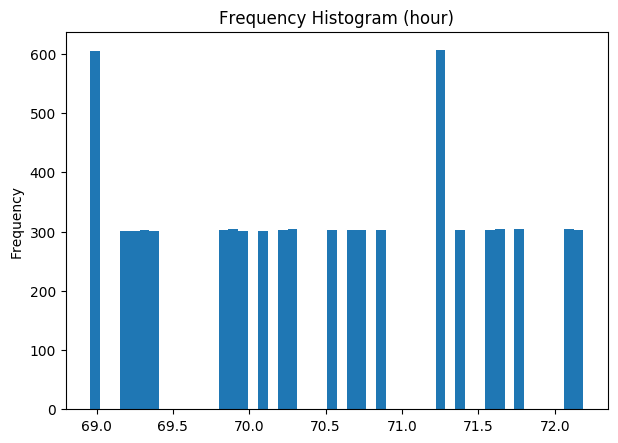

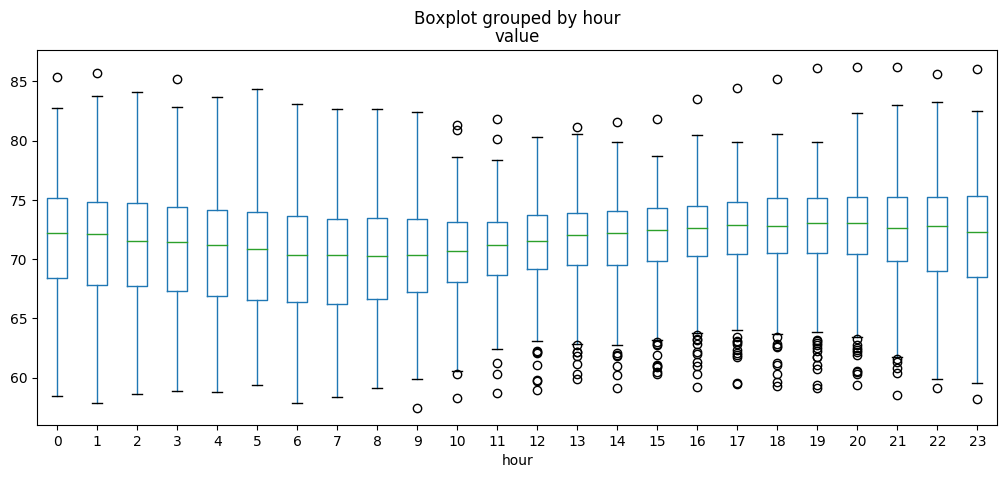

In [17]:
plt.hist(data_frame.loc[data_frame["hour"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (hour)", ylabel="Frequency")

data_frame.boxplot(by='hour', column=['value'], grid=False, figsize=(12,5))

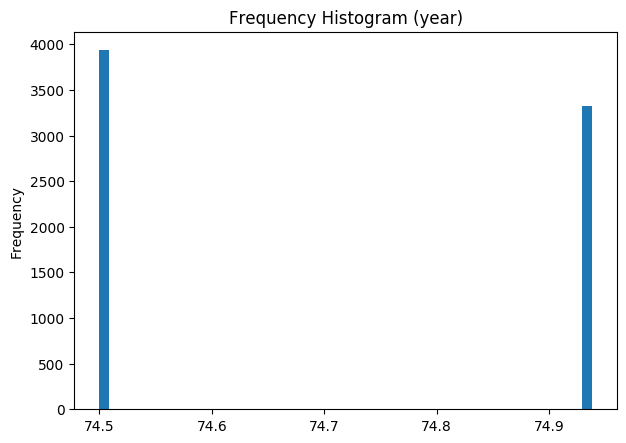

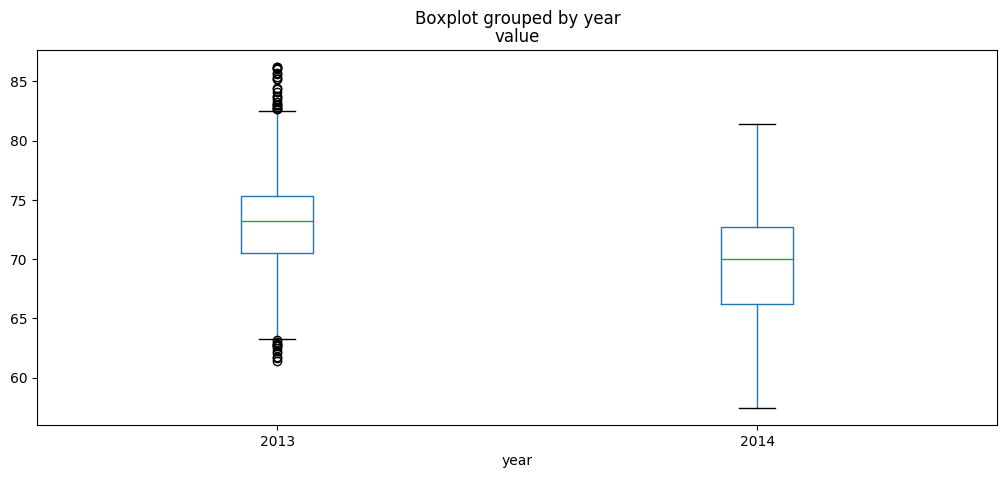

In [18]:
plt.hist(data_frame.loc[data_frame["year"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (year)", ylabel="Frequency")

data_frame.boxplot(by='year', column=['value'], grid=False, figsize=(12,5))

In [10]:
from sklearn.model_selection import train_test_split

tr_data_frame, tst_data_frame = train_test_split(data_frame)

In [66]:
tr_data_frame

,timestamp,value,hour,daylight,day of week,is weekend,day of the year,year
4307,2014-01-16 06:00:00,72.802560,6,am,3,False,16,2014
2615,2013-11-06 18:00:00,75.722611,18,pm,2,False,310,2013
7231,2014-05-27 04:00:00,65.406613,4,am,1,False,147,2014
4414,2014-01-20 17:00:00,75.515436,17,pm,0,False,20,2014
3298,2013-12-05 05:00:00,76.663525,5,am,3,False,339,2013
...,...,...,...,...,...,...,...,...
2998,2013-11-22 17:00:00,75.973424,17,pm,4,False,326,2013
5521,2014-03-09 01:00:00,65.415429,1,am,6,True,68,2014
2434,2013-10-30 05:00:00,74.160885,5,am,2,False,303,2013
4896,2014-02-09 19:00:00,70.751697,19,pm,6,True,40,2014


In [30]:
tst_data_frame

,timestamp,value,hour,daylight,day of week,is weekend,day of the year,year
2931,2013-11-19 22:00:00,76.710816,22,pm,1,False,323,2013
6436,2014-04-24 01:00:00,68.252653,1,am,3,False,114,2014
1726,2013-09-23 20:00:00,72.507102,20,pm,0,False,266,2013
4150,2014-01-09 17:00:00,75.254636,17,pm,3,False,9,2014
6071,2014-04-01 15:00:00,70.315354,15,pm,1,False,91,2014
...,...,...,...,...,...,...,...,...
1344,2013-09-01 07:00:00,66.947261,7,am,6,True,244,2013
3464,2013-12-12 03:00:00,74.961661,3,am,3,False,346,2013
2869,2013-11-17 08:00:00,72.019457,8,am,6,True,321,2013
1879,2013-10-04 04:00:00,76.818098,4,am,4,False,277,2013


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

data = data_frame.copy().loc[:,'value':'year']
# scale data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data)
data = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)
# transform data
data = pca.fit_transform(data)
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled)

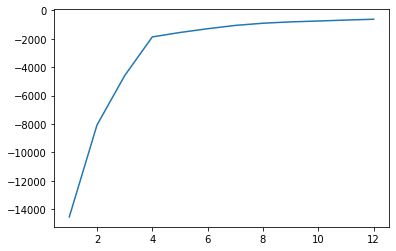

,0,1
0,0.010624,1.416368
1,-0.104163,1.344899
2,-0.098503,1.276361
3,0.020025,1.210569
4,-0.022053,1.140869
...,...,...
7262,0.466114,0.187009
7263,0.192947,-0.839546
7264,0.183136,-0.908461
7265,0.180124,-0.977210


In [13]:
# create an elbow plot to determine k (where the elbow occurs/line bends)
n_cluster = range(1, 13) 
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster] 
scores = [kmeans[i].score(data) for i in range(len(kmeans))] 
fig, ax = plt.subplots() 
ax.plot(n_cluster, scores) 
plt.show()
data

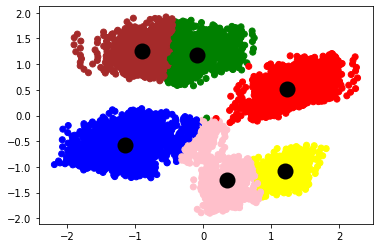

[[ 1.23529985  0.51741775]
 [-1.14692926 -0.57631969]
 [-0.08919156  1.18483671]
 [ 0.34470986 -1.26121638]
 [ 1.21146458 -1.07708729]
 [-0.89750496  1.25146238]]


In [14]:
# predict clusters with your k
# k = however many clusters you determined from your elbow plot or silhouette method
data['cluster'] = kmeans[5].predict(data)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
# plot the clusters and their respective amounts of data
data['cluster'].value_counts()
# plot the different clusters with the 2 main PCA features 
fig, ax = plt.subplots() 
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'yellow' , 5:'brown', 6:'purple'} 
ax.scatter(data['principal_feature1'], data['principal_feature2'], c=data["cluster"].apply(lambda x: colors[x]))
centr = kmeans[5].cluster_centers_
plt.scatter(centr[:, 0], centr[:, 1], marker="o", s=169, linewidths=3, color="k")
#centr2d = pca.transform(centr)
plt.show()
print(centr)

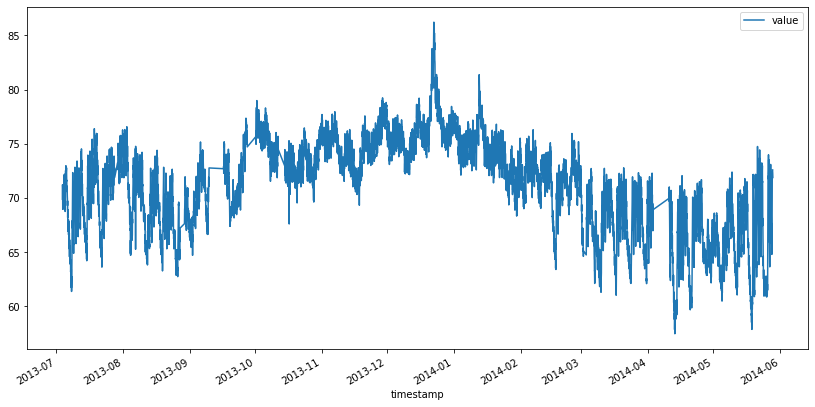

In [177]:
data_frame.plot(x='timestamp',y='value', figsize=(14, 7))

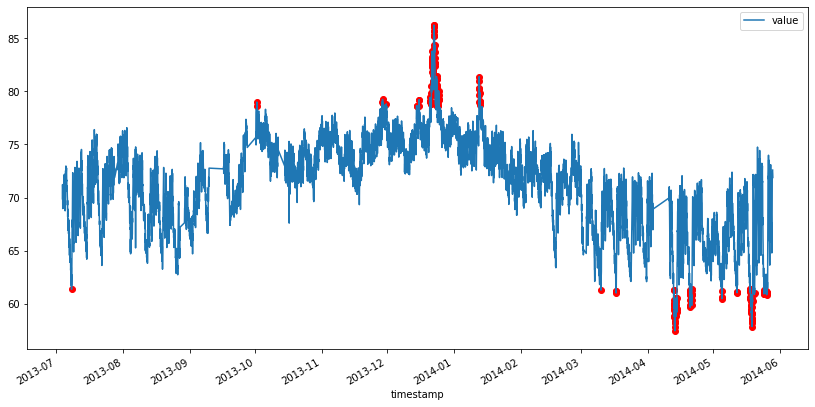

In [15]:
# Support Vector Machine (SVM)
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
x = data_frame['value'].values.reshape(-1,1)
svm.fit(x)
pred = svm.predict(x)

res=pd.DataFrame()
res['timestamp'] = data_frame['timestamp']
res['value'] = data_frame['value']

res['anomalies']  = pred
res.plot(x='timestamp', y='value', figsize=(14,7))
a=res[res['anomalies']==-1]
plt.scatter(x=a.timestamp, y=a.value, color='r')

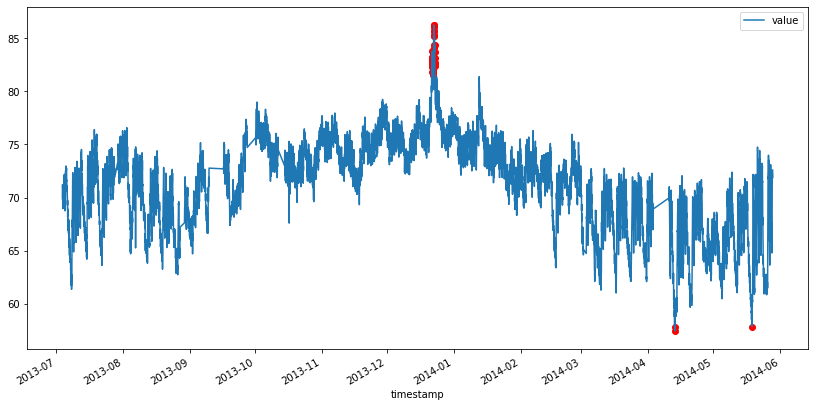

In [16]:
# Isolation forest
from sklearn.ensemble import IsolationForest

isofr = IsolationForest(contamination=0.005)
pred1 = isofr.fit_predict(data_frame['value'].values.reshape(-1,1))

res1 = pd.DataFrame()
res1['timestamp'] = data_frame['timestamp']
res1['value'] = data_frame['value']

res1['anomalies']  = pred1
res1.plot(x='timestamp', y='value', figsize=(14,7))

a1=res1[res1['anomalies']==-1]

plt.scatter(x=a1.timestamp, y=a1.value, color='r')

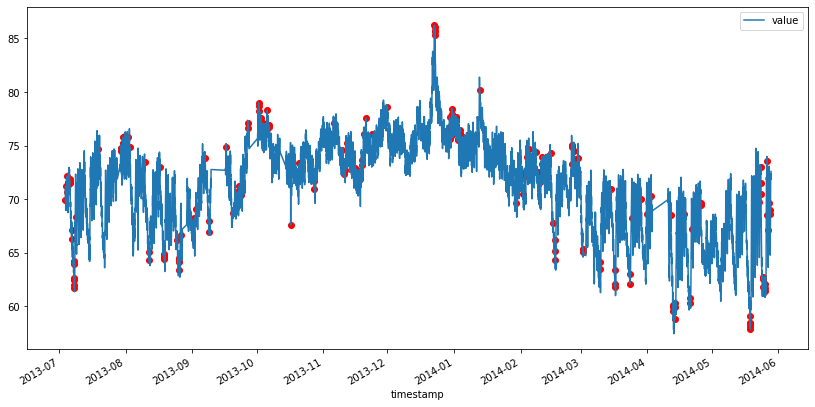

In [18]:
# Support Vector Machine (SVM) for all features
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
x = data_frame.copy().loc[:, 'value':'year']
svm.fit(x)
pred = svm.predict(x)

res = data_frame.copy()

res['anomalies']  = pred
res.plot(x='timestamp', y='value', figsize=(14,7))
a=res[res['anomalies']<0]
plt.scatter(x=a.timestamp, y=a.value, color='r')

In [ ]:
# Isolation forest
from sklearn.ensemble import IsolationForest

isofr = IsolationForest(contamination=0.005)
x = data_frame.copy().loc[:, 'value':'year']
pred1 = isofr.fit_predict(x)

res1 = pd.DataFrame()
res1['timestamp'] = data_frame['timestamp']
res1['value'] = data_frame['value']

res1['anomalies']  = pred1
res1.plot(x='timestamp', y='value', figsize=(14,7))

a1=res1[res1['anomalies']==-1]

plt.scatter(x=a1.timestamp, y=a1.value, color='r')